In [44]:
import numpy as np
from plyfile import PlyData, PlyElement

In [133]:
def read_ply_with_plyfile(file_path="C:/Users/ASUS/Desktop/Dataset/Training_data/Feature/mesh_001.ply"):
    try:
        plydata = PlyData.read(file_path)
        print(plydata.elements)
        vertex_data = plydata['vertex']
        face = list(map(lambda x:x.tolist(),plydata['face']['vertex_indices']))
        x = vertex_data['x']
        y = vertex_data['y']
        z = vertex_data['z']
        vertex = np.stack([x, y, z], axis=-1)
        return vertex, np.array(face)
    except Exception as e:
        print(f"读取 .ply 文件时出错: {e}")
        return None

In [ ]:
wind = 20
vertex, face = read_ply_with_plyfile()
print(vertex) # (3586, 3)
print(face) # (7168, 3)

(PlyElement('vertex', (PlyProperty('x', 'double'), PlyProperty('y', 'double'), PlyProperty('z', 'double')), count=3586, comments=[]), PlyElement('face', (PlyListProperty('vertex_indices', 'uchar', 'uint'),), count=7168, comments=[]))
[[-0.70499998  0.13500001 -2.0487299 ]
 [-0.7159      0.255       2.04500008]
 [-0.72500002  0.62965697 -1.94500005]
 ...
 [-0.25264999  0.87105203  2.10132003]
 [-0.26045099  0.77539802  2.13125992]
 [-0.0895247   0.78351998  2.1377399 ]]
[[   0  900 2690]
 [   0 2690  898]
 [ 228 1798 2690]
 ...
 [ 897 3585 1977]
 [ 597 1417 3585]
 [ 597 3585 2537]]


In [124]:
s = np.array([[1,2],[3,4]])
s.shape

(2, 2)

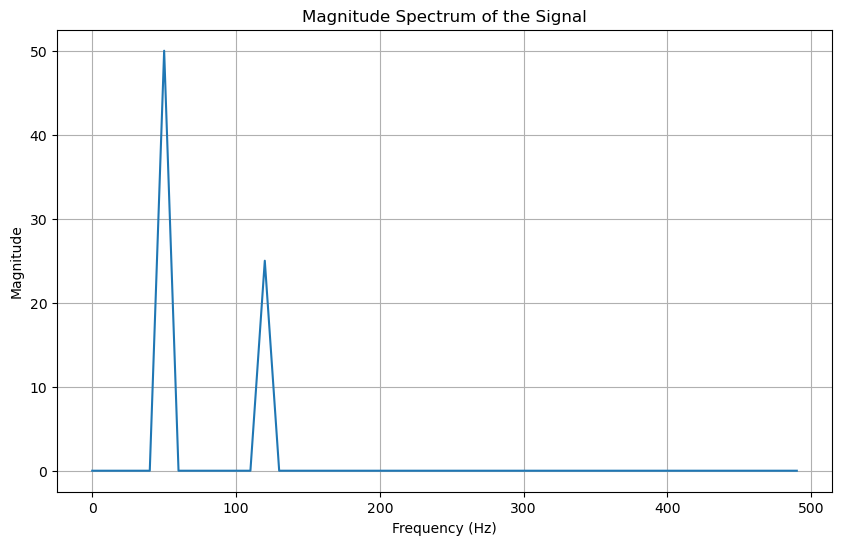

[-1.84331037e-15+0.00000000e+00j  1.01064310e-15-2.02060590e-14j
  1.69575292e-14+1.22012906e-14j -8.53727491e-15+9.10382880e-15j
 -9.17733312e-15-1.17149190e-14j  3.09069157e-14-5.00000000e+01j
  4.60052358e-15+2.10467762e-14j  6.21517708e-15+7.03714990e-15j
 -7.91519629e-16+0.00000000e+00j  1.53659339e-14+1.36338306e-14j
  2.49957763e-15+1.90641764e-14j  1.75818008e-14+3.42141701e-14j
 -7.22898824e-14-2.50000000e+01j -1.85572835e-15-7.74577756e-15j
 -1.31386788e-14-1.62911950e-14j -1.65220365e-14-2.13162821e-14j
  7.81272710e-15-1.56261605e-14j  1.50853401e-14-8.57348581e-15j
  1.78991078e-14-9.02812816e-15j  2.19054639e-14+1.97942290e-14j
 -5.78555806e-15+1.66475111e-14j -1.15505461e-14+1.00946506e-15j
  9.53863156e-15+1.32380099e-15j -6.60653684e-15+8.59906688e-15j
 -1.23263513e-15+1.10560724e-15j -1.26556875e-14-9.49318441e-15j
  1.02123263e-14+2.87003803e-15j -4.78383299e-15+7.42884373e-15j
  7.85499575e-17+1.06581410e-14j -1.91481312e-15+3.99887375e-15j
 -6.68579873e-15-8.936874

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 设置参数
fs = 1000  # 采样频率 (Hz)
N = 100   # 采样点数
T = 1 / fs  # 采样周期
t = np.linspace(0, (N-1)*T, N)  # 时间向量

# 生成信号：50 Hz 和 120 Hz 的正弦波
x = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)

# 计算DFT
X = np.fft.fft(x)

# 计算频率轴
freq = np.fft.fftfreq(N, T)

# 只显示正频率部分
half_N = N // 2
X_magnitude = np.abs(X[:half_N])
freq = freq[:half_N]

# 绘制信号的频谱
plt.figure(figsize=(10, 6))
plt.plot(freq, X_magnitude)
plt.title("Magnitude Spectrum of the Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()
print(X)
